In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("feature_engineering_dataset.csv")
df.head(5)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Total_Activity_Hours,Study_Sleep_Ratio
0,0.287500,0.158333,0.362500,0.116667,0.075000,0.7475,1,0.637500,0.793103
1,0.220833,0.145833,0.333333,0.175000,0.125000,0.6875,0,0.666667,0.662500
2,0.212500,0.162500,0.383333,0.050000,0.191667,0.6675,0,0.616667,0.554348
3,0.270833,0.087500,0.300000,0.070833,0.270833,0.7200,1,0.700000,0.902778
4,0.337500,0.025000,0.270833,0.091667,0.275000,0.8775,2,0.729167,1.246154


In [33]:
x = df.drop(['Stress_Level'], axis=1) 
y = df['Stress_Level']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.855


In [11]:
print("\nClassifiaction Report:\n",classification_report(y_test,y_pred))


Classifiaction Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        59
           1       0.80      0.83      0.81       135
           2       0.90      0.84      0.87       206

    accuracy                           0.85       400
   macro avg       0.85      0.87      0.86       400
weighted avg       0.86      0.85      0.86       400



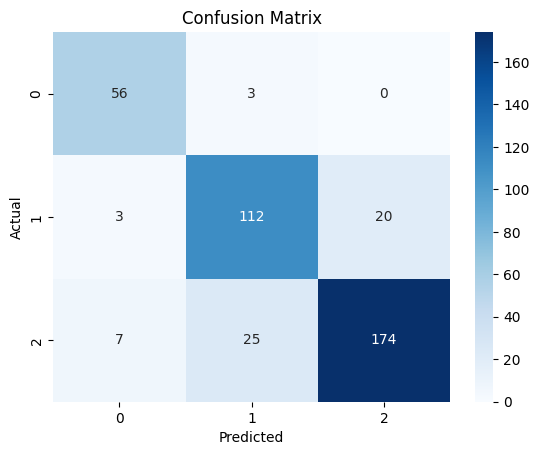

In [12]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res,y_train_res)

y_pred_rf = rf_model.predict(X_test)

In [14]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=42)
xgb_model.fit(X_train_res,y_train_res)

y_pred_xgb = xgb_model.predict(X_test)

c:\Users\Ms Traders&Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [10:15:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
from sklearn.metrics import classification_report, accuracy_score

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

🔹 Logistic Regression
Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        59
           1       0.80      0.83      0.81       135
           2       0.90      0.84      0.87       206

    accuracy                           0.85       400
   macro avg       0.85      0.87      0.86       400
weighted avg       0.86      0.85      0.86       400


🔹 Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       206

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


🔹 XGBoost
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00  

In [16]:
print("Original test set class distribution:")
print(pd.Series(y_test).value_counts())

Original test set class distribution:
Stress_Level
2    206
1    135
0     59
Name: count, dtype: int64


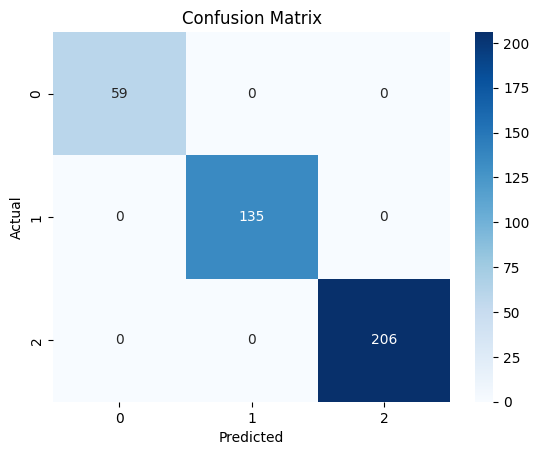

In [17]:
cm = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
import pandas as pd
pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

Study_Hours_Per_Day                0.500444
Study_Sleep_Ratio                  0.194640
Sleep_Hours_Per_Day                0.092992
GPA                                0.081432
Total_Activity_Hours               0.080345
Physical_Activity_Hours_Per_Day    0.029803
Social_Hours_Per_Day               0.011318
Extracurricular_Hours_Per_Day      0.009026
dtype: float64

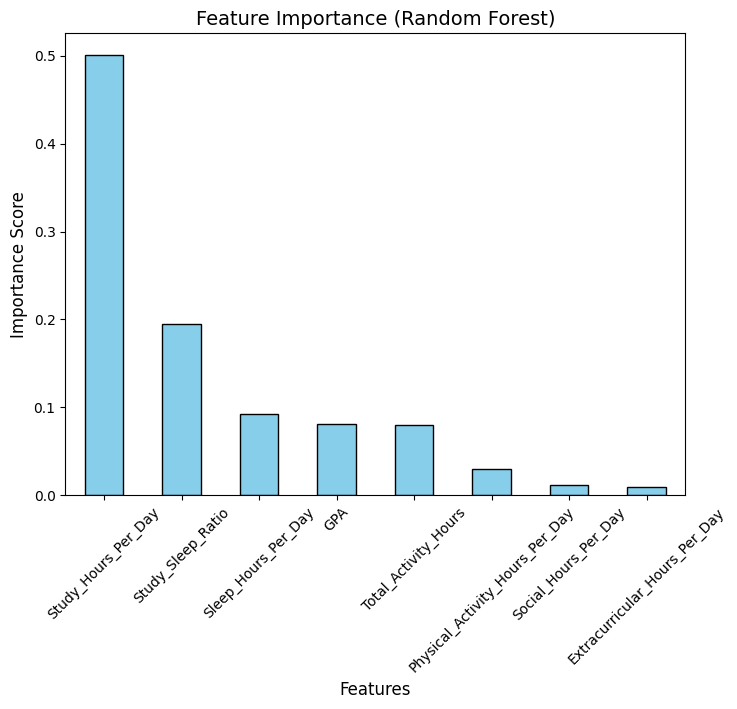

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importances 
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(8,6))
feat_imp.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.ylabel("Importance Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

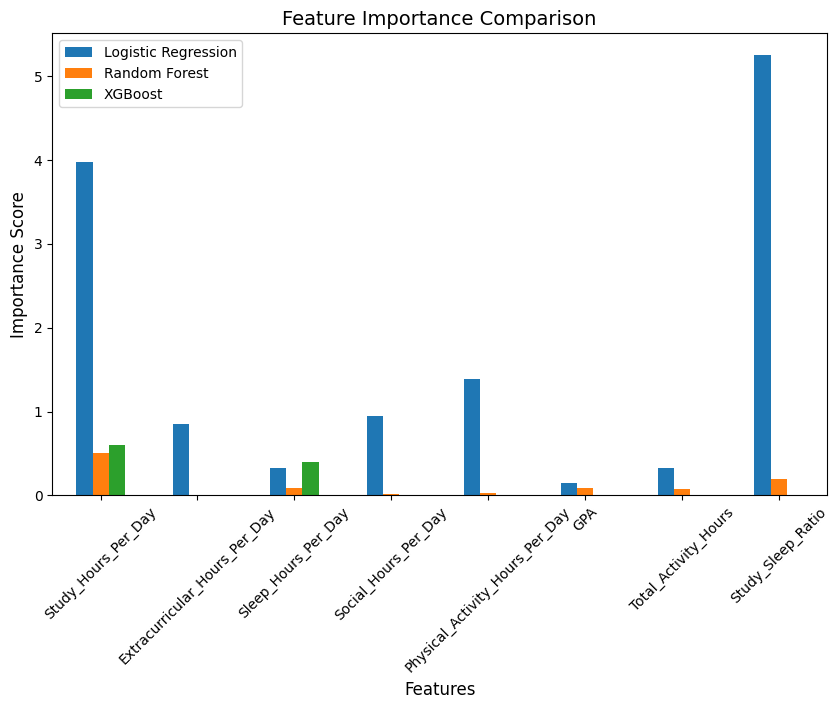

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression coefficients
log_reg_importance = np.abs(model.coef_[0])   # absolute values
log_reg_importance = pd.Series(log_reg_importance, index=x.columns, name="Logistic Regression")

rf_importance = pd.Series(rf_model.feature_importances_, index=x.columns, name="Random Forest")
xgb_importance = pd.Series(xgb_model.feature_importances_, index=x.columns, name="XGBoost")

all_importances = pd.concat([log_reg_importance, rf_importance, xgb_importance], axis=1)

#Graph->kis model me kaun sa feature zyada important hai.
plt.figure(figsize=(10,6))
all_importances.plot(kind="bar", figsize=(10,6))
plt.title("Feature Importance Comparison", fontsize=14)
plt.ylabel("Importance Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [40]:
import joblib

joblib.dump(rf_model, "stress_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [41]:
loaded_model = joblib.load("stress_model.pkl")

In [42]:
y_pred = loaded_model.predict(X_test)

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, x, y, cv=5, scoring='accuracy')
print("CV Accuracies:", scores)
print("Mean Accuracy:", scores.mean())

CV Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
